Model Accuracy: 1.00


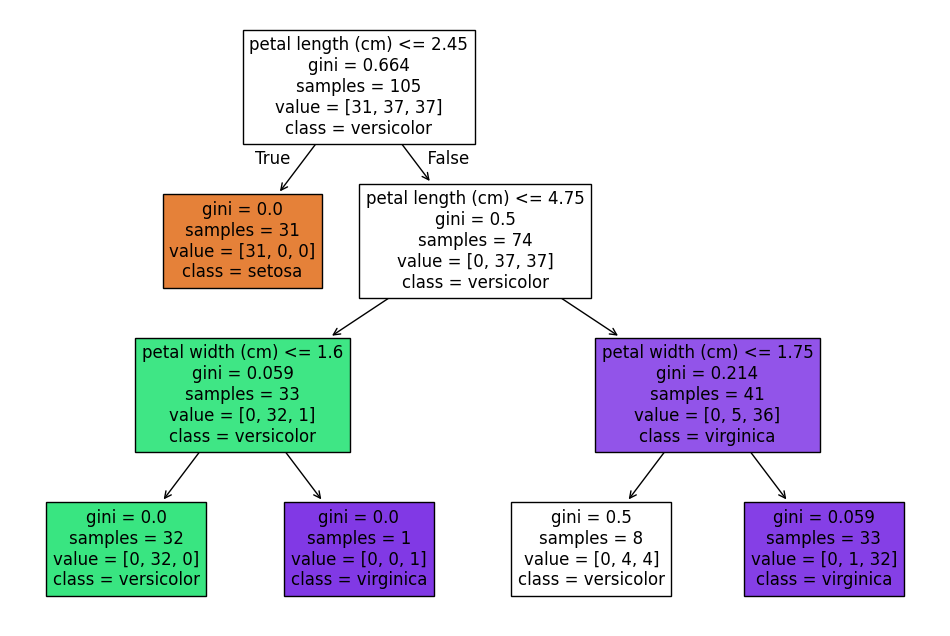

In [ ]:
#Small dataset using gini

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dtree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

plt.figure(figsize=(12, 8))
plot_tree(dtree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

Model Accuracy: 0.98


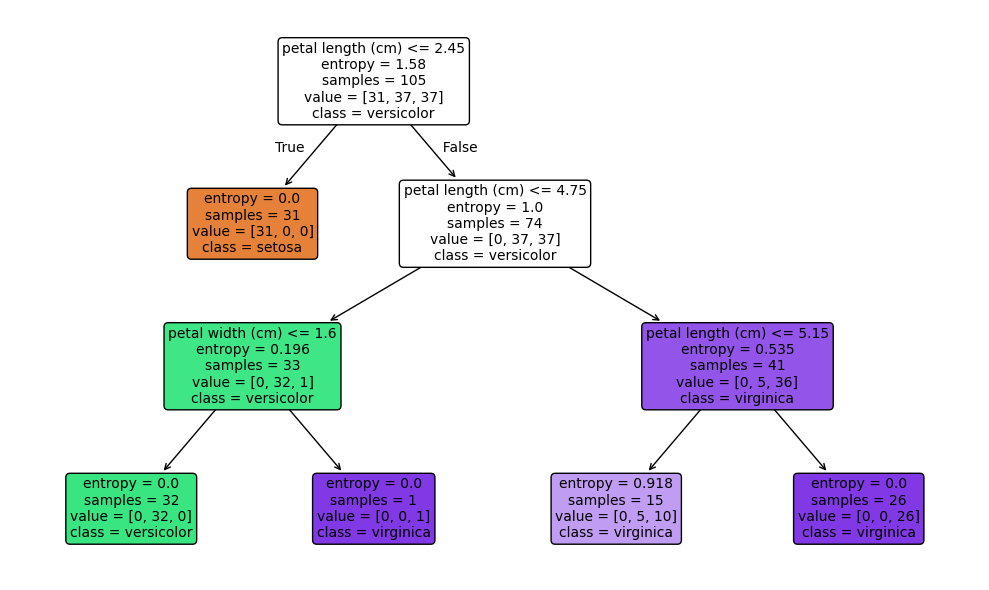

In [ ]:
#Small dataset using Entropy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

plt.figure(figsize=(10, 6), dpi=100)
plot_tree(dtree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, fontsize=10)
plt.tight_layout()
plt.show()

Model Accuracy: 0.69


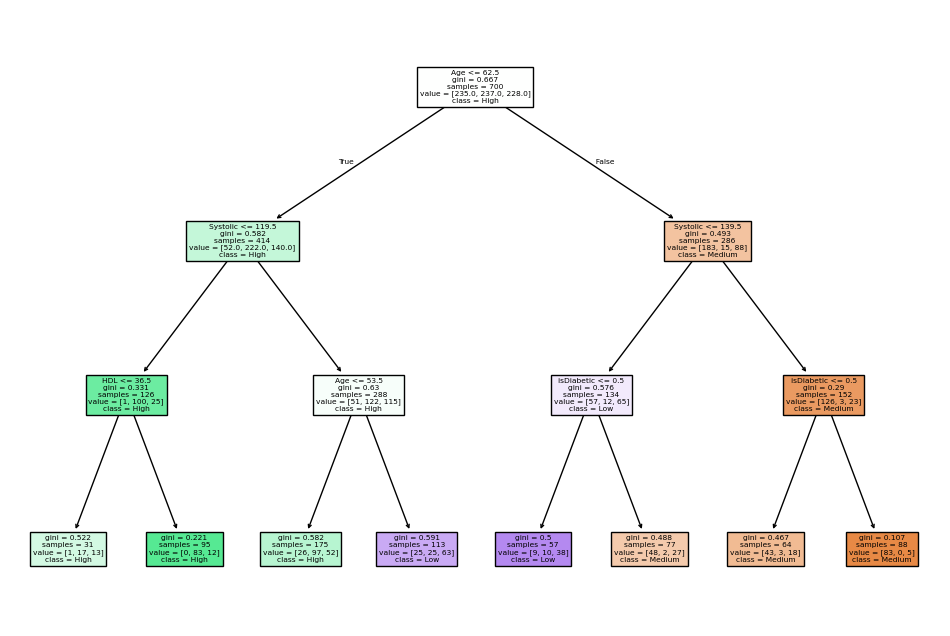

In [ ]:
#Large dataset using gini

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

df = pd.read_csv("heartRisk.csv")

if df["Risk"].dtype in ['float64', 'int64']:
    df["Risk"] = pd.qcut(df["Risk"], q=3, labels=["Low", "Medium", "High"])

X = df.drop(columns=["Risk"])
y = df["Risk"].astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dtree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

plt.figure(figsize=(12, 8))
plot_tree(dtree, feature_names=X.columns, class_names=y.unique().astype(str), filled=True)
plt.show()


In [ ]:
#Large dataset using entropy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

df = pd.read_csv("heartRisk.csv")

if df["Risk"].dtype in ['float64', 'int64']:
    df["Risk"] = pd.qcut(df["Risk"], q=3, labels=["Low", "Medium", "High"])

X = df.drop(columns=["Risk"])
y = df["Risk"].astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

plt.figure(figsize=(12, 8))
plot_tree(dtree, feature_names=X.columns, class_names=y.unique().astype(str), filled=True)
plt.show()


Model Accuracy: 0.65


In [ ]:
#Class dataset using

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

weather_data_dict = {
    "Outlook": ["sunny", "sunny", "overcast", "rain", "rain", "rain", "overcast",
                "sunny", "sunny", "rain", "sunny", "overcast", "overcast", "rain"],
    "Temperature": ["hot", "hot", "hot", "mild", "cool", "cool", "cool",
                    "mild", "cool", "mild", "mild", "mild", "hot", "mild"],
    "Humidity": ["high", "high", "high", "high", "normal", "normal", "normal",
                 "high", "normal", "normal", "normal", "high", "normal", "high"],
    "Windy": [False, True, False, False, False, True, True,
              False, False, False, True, True, False, True],
    "Class": ["N", "N", "P", "P", "P", "N", "P",
              "N", "P", "P", "P", "P", "P", "N"]
}

weather_data = pd.DataFrame(weather_data_dict)

label_encoders = {}
for column in ["Outlook", "Temperature", "Humidity", "Windy", "Class"]:
    le = LabelEncoder()
    weather_data[column] = le.fit_transform(weather_data[column])
    label_encoders[column] = le

X = weather_data.drop(columns=["Class"])
y = weather_data["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dtree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

plt.figure(figsize=(10, 6), dpi=100)
plot_tree(dtree, feature_names=X.columns, class_names=label_encoders["Class"].classes_, filled=True, rounded=True, fontsize=10)
plt.tight_layout()
plt.show()


Model Accuracy: 0.60


Model Accuracy: 0.60


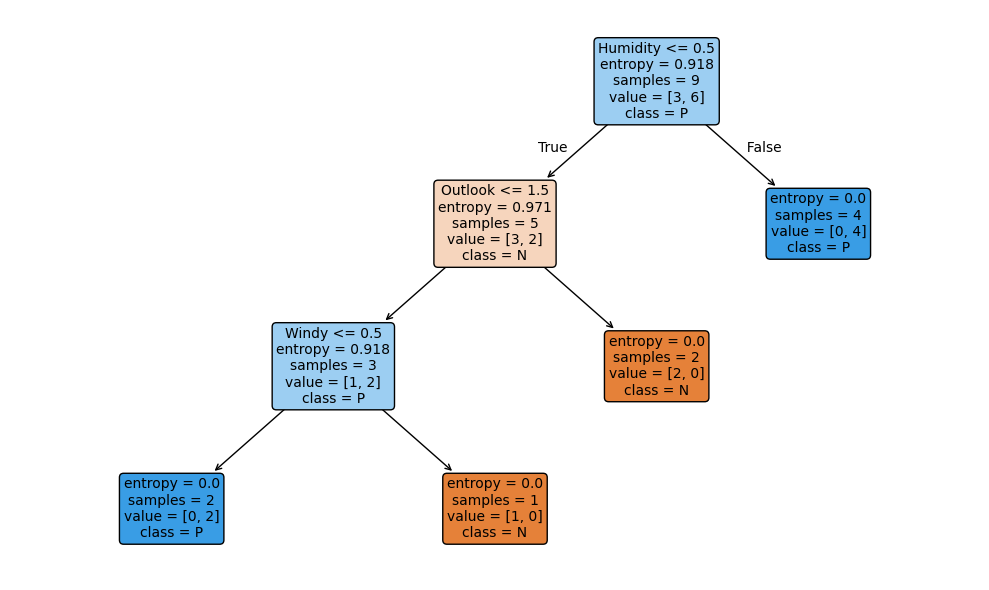

In [ ]:
#Class dataset using entropy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

weather_data_dict = {
    "Outlook": ["sunny", "sunny", "overcast", "rain", "rain", "rain", "overcast",
                "sunny", "sunny", "rain", "sunny", "overcast", "overcast", "rain"],
    "Temperature": ["hot", "hot", "hot", "mild", "cool", "cool", "cool",
                    "mild", "cool", "mild", "mild", "mild", "hot", "mild"],
    "Humidity": ["high", "high", "high", "high", "normal", "normal", "normal",
                 "high", "normal", "normal", "normal", "high", "normal", "high"],
    "Windy": [False, True, False, False, False, True, True,
              False, False, False, True, True, False, True],
    "Class": ["N", "N", "P", "P", "P", "N", "P",
              "N", "P", "P", "P", "P", "P", "N"]
}

weather_data = pd.DataFrame(weather_data_dict)

label_encoders = {}
for column in ["Outlook", "Temperature", "Humidity", "Windy", "Class"]:
    le = LabelEncoder()
    weather_data[column] = le.fit_transform(weather_data[column])
    label_encoders[column] = le

X = weather_data.drop(columns=["Class"])
y = weather_data["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

plt.figure(figsize=(10, 6), dpi=100)
plot_tree(dtree, feature_names=X.columns, class_names=label_encoders["Class"].classes_, filled=True, rounded=True, fontsize=10)
plt.tight_layout()
plt.show()


Training Data Size: (7, 4) (7,)
Testing Data Size: (3, 4) (3,)


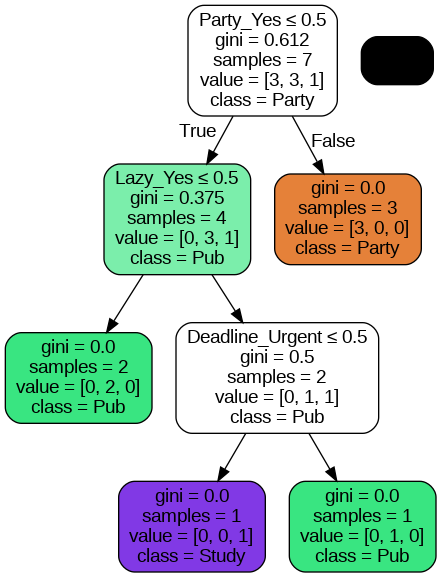

Decision Tree (Gini) Training Accuracy: 1.00
Decision Tree (Gini) Test Accuracy: 0.67
Decision Tree (Gini) Number of Nodes: 7
Decision Tree (Gini) Height: 3

Confusion Matrix:
 [[2 0 0]
 [0 0 1]
 [0 0 0]]

Classification Report (Gini) with Zero Division Handling:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0

    accuracy                           0.67         3
   macro avg       0.33      0.33      0.33         3
weighted avg       0.67      0.67      0.67         3



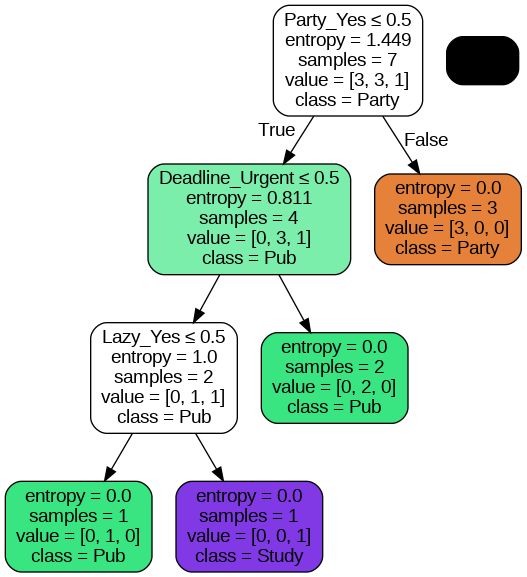

Decision Tree (Entropy) Training Accuracy: 1.00
Decision Tree (Entropy) Test Accuracy: 0.67
Decision Tree (Entropy) Number of Nodes: 7
Decision Tree (Entropy) Height: 3

Confusion Matrix:
 [[2 0 0]
 [0 0 1]
 [0 0 0]]

Classification Report (Entropy) with Zero Division Handling:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0

    accuracy                           0.67         3
   macro avg       0.33      0.33      0.33         3
weighted avg       0.67      0.67      0.67         3



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
import pydotplus
from io import StringIO
from IPython.display import display, Image

data = pd.DataFrame({
    'Deadline': ['Urgent', 'Urgent', 'Near', 'None', 'None', 'None', 'Near', 'Near', 'Near', 'Urgent'],
    'Party': ['Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No'],
    'Lazy': ['Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No'],
    'Activity': ['Party', 'Study', 'Party', 'Party', 'Pub', 'Party', 'Study', 'TV', 'Party', 'Study']
})


data = pd.get_dummies(data, columns=['Deadline', 'Party', 'Lazy'], drop_first=True)

X = data.drop('Activity', axis=1)
y = data['Activity']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("Training Data Size:", X_train.shape, y_train.shape)
print("Testing Data Size:", X_test.shape, y_test.shape)

decision_tree_gini = tree.DecisionTreeClassifier(criterion='gini', random_state=1)
clf_gini = decision_tree_gini.fit(X_train, y_train)

gini_num_nodes = clf_gini.tree_.node_count
gini_height = clf_gini.tree_.max_depth

y_pred_gini = clf_gini.predict(X_test)

dotfilegraph_gini = StringIO()
dot_data_gini = tree.export_graphviz(clf_gini, out_file=dotfilegraph_gini,
                                     feature_names=X.columns,
                                     class_names=label_encoder.classes_,
                                     filled=True, rounded=True,
                                     special_characters=True)
graph_gini = pydotplus.graph_from_dot_data(dotfilegraph_gini.getvalue())
display(Image(graph_gini.create_png()))

print("Decision Tree (Gini) Training Accuracy: {:.2f}".format(decision_tree_gini.score(X_train, y_train)))
print("Decision Tree (Gini) Test Accuracy: {:.2f}".format(decision_tree_gini.score(X_test, y_test)))
print(f"Decision Tree (Gini) Number of Nodes: {gini_num_nodes}")
print(f"Decision Tree (Gini) Height: {gini_height}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gini))
print("\nClassification Report (Gini) with Zero Division Handling:\n",
      classification_report(y_test, y_pred_gini, zero_division=0))

decision_tree_entropy = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
clf_entropy = decision_tree_entropy.fit(X_train, y_train)

entropy_num_nodes = clf_entropy.tree_.node_count
entropy_height = clf_entropy.tree_.max_depth

y_pred_entropy = clf_entropy.predict(X_test)

dotfilegraph_entropy = StringIO()
dot_data_entropy = tree.export_graphviz(clf_entropy, out_file=dotfilegraph_entropy,
                                       feature_names=X.columns,
                                       class_names=label_encoder.classes_,
                                       filled=True, rounded=True,
                                       special_characters=True)
graph_entropy = pydotplus.graph_from_dot_data(dotfilegraph_entropy.getvalue())
display(Image(graph_entropy.create_png()))

print("Decision Tree (Entropy) Training Accuracy: {:.2f}".format(decision_tree_entropy.score(X_train, y_train)))
print("Decision Tree (Entropy) Test Accuracy: {:.2f}".format(decision_tree_entropy.score(X_test, y_test)))
print(f"Decision Tree (Entropy) Number of Nodes: {entropy_num_nodes}")
print(f"Decision Tree (Entropy) Height: {entropy_height}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_entropy))
print("\nClassification Report (Entropy) with Zero Division Handling:\n",
      classification_report(y_test, y_pred_entropy, zero_division=0))
